You toss 300 Pieces of paper into a bin you miss the first but make the second. Your chance of hitting the bin = your win rate 

What is the probability you will get 298 Correct Hits.

In [6]:
import numpy as np
from numpy.random import binomial as nprb , seed as nprs
nprs(69)

In [10]:
def get_prob(hits, attempts, mode):
    success_rate = hits / attempts
    if mode == "p1":
        return success_rate
    elif mode == "p2":
        return 1 - success_rate
    
def sim_games(mode, n =10, games = 100000):
    results = []
    
    for i in range(int(games)):
        hits = 1 
        for attempt in range(3 , n+1):
            prob = get_prob(hits, attempt - 1, mode)
            hits += nprb(1, prob, 1) [0]
        results.append(hits) 
    return results

games_p1 = sim_games("p1")
games_p2 = sim_games("p2")


print(np.average([x == 8 for x in games_p1]))
print(np.average([x == 8 for x in games_p2]))

0.1121
0.00145


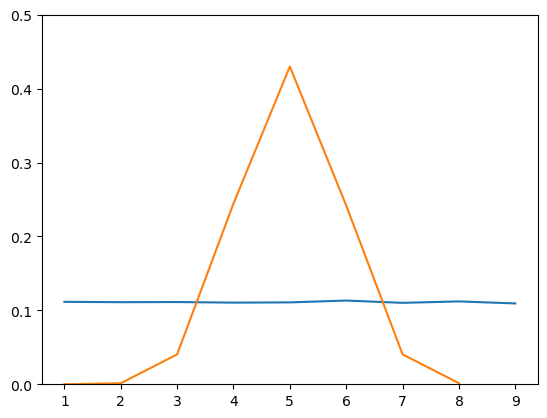

In [11]:
import pandas as pd 
for g in [games_p1,games_p2]:
    pd.Series(g).value_counts(normalize= True)\
        .sort_index().plot(ylim=[0,0.5])